(11,) (11,)
(4,) (10,)


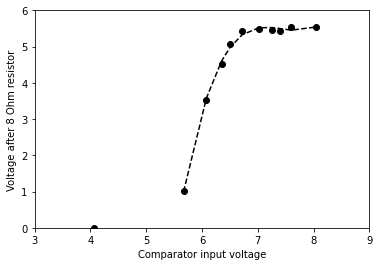

In [1]:
''' poly1d '''

import numpy as np
import matplotlib.pyplot as plt
from numpy import polyfit, poly1d

comparator_input = np.array([4.06, 5.67, 6.08, 6.35, 6.5, 6.72, 7.02, 
                             7.25, 7.4, 7.6, 8.04], dtype=float)
after_resistor = np.array([0.006, 1.02, 3.53, 4.51, 5.07, 5.42, 5.49, 
                           5.46, 5.44, 5.54, 5.53], dtype=float)

x = comparator_input
y = after_resistor

fit = polyfit(x[1:], y[1:], deg=3)
# fit_fn is now a function which takes in x and returns an estimate for y
fit_fn = poly1d(fit) 

print(x.shape, y.shape)
print(fit.shape, fit_fn(x[1:]).shape)

fig, ax1 = plt.subplots(1)

ax1.plot(x[1:], fit_fn(x[1:]), '--k', label='3rd degree polyfit')

#ax1.legend()
ax1.set_xlabel('Comparator input voltage')
ax1.set_ylabel('Voltage after 8 Ohm resistor')

ax1.plot(x, y, 'ko')
ax1.set_xlim([3, 9])
ax1.set_ylim([0, 6])
plt.show()

4.794743977155804 1.3540863767485396 0.41498889947001666
[[ 0.03311911  0.00758876 -0.00157974]
 [ 0.00758876  0.01196564  0.00600514]
 [-0.00157974  0.00600514  0.00586797]]


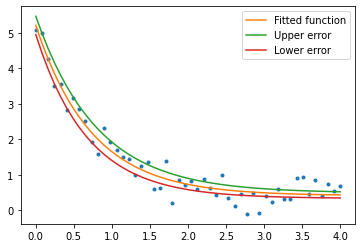

In [7]:
''' Non-linear least squares. For the Levenberg-Marquardt algorithm (via MINPAK), 
        use method='lm' '''

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def f(t, a, b, c):
    return a*np.exp(-b*t) + c

xpts = np.linspace(0,4,50)
ypts = f(xpts, 5.0, 1.5, 0.5)
ypts += 0.25 * np.random.normal(size=len(xpts))

# Initial guess for the 4 parameters
# guess = []

(a, b, c), pcov = curve_fit(f, xpts, ypts)

print(a, b, c)
print(pcov)

sigma = [np.sqrt(pcov[0,0]), np.sqrt(pcov[1,1]), np.sqrt(pcov[2,2]) ]

plt.plot(xpts, ypts, '.')
plt.plot(xpts, f(xpts, a, b, c), label='Fitted function')
plt.plot(xpts, f(xpts, a + sigma[0], b - sigma[1], c + sigma[2]), label='Upper error')
plt.plot(xpts, f(xpts, a - sigma[0], b + sigma[1], c - sigma[2]), label='Lower error')

plt.legend()
plt.show()
plt.close()

x0 = 448.3608616658417
y0 = 136.21091094862214
c = 118.79912706289531
k = 0.013497151029891317

[ 0.76205287 -2.01014171  2.6026528  -3.02849164  1.67392769]
[ 0.76205287 -2.01014171  2.6026528  -3.02849164  1.67392769]
0.9967681319594354


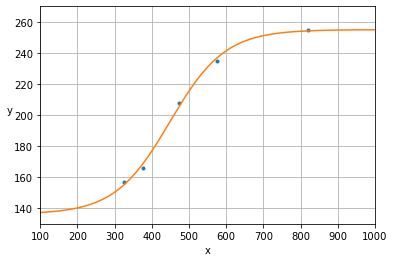

In [10]:
''' SciPy LeastSq Goodness of Fit Estimator

        https://stackoverflow.com/questions/7588371/scipy-leastsq-goodness-of-fit-estimator'''

import scipy.optimize as optimize
import numpy as np
import collections
import matplotlib.pyplot as plt

x = np.array([821,576,473,377,326])
y = np.array([255,235,208,166,157])

def sigmoid(p,x):
    x0,y0,c,k=p
    y = c / (1 + np.exp(-k*(x-x0))) + y0
    return y

def residuals(p,x,y):
    return y - sigmoid(p,x)

Param=collections.namedtuple('Param','x0 y0 c k')

p_guess=Param(x0=600,y0=200,c=100,k=0.01)

p,cov,infodict,mesg,ier = optimize.leastsq(residuals, p_guess, args=(x,y),full_output=True)

p=Param(*p)
xp = np.linspace(100, 1600, 1500)
print('''\
x0 = {p.x0}
y0 = {p.y0}
c = {p.c}
k = {p.k}
'''.format(p=p))
pxp=sigmoid(p,xp)

# You could compute the residuals this way:
resid=residuals(p,x,y)
print(resid)
# [ 0.76205302 -2.010142    2.60265297 -3.02849144  1.6739274 ]

# But you don't have to compute `resid` -- `infodict['fvec']` already
# contains the info.
print(infodict['fvec'])
# [ 0.76205302 -2.010142    2.60265297 -3.02849144  1.6739274 ]

ss_err=(infodict['fvec']**2).sum()
ss_tot=((y-y.mean())**2).sum()
rsquared=1-(ss_err/ss_tot)
print(rsquared)
# 0.996768131959

plt.plot(x, y, '.', xp, pxp, '-')
plt.xlim(100,1000)
plt.ylim(130,270)
plt.xlabel('x')
plt.ylabel('y',rotation='horizontal')
plt.grid(True)
plt.show()
